### **import library**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWii7POFbWtIUTJe6co3qSab7P-q7s7jCwoiUcX9tiGpZM8siHWCuDs
Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import os
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

### **convert train pos and train neg txt files to csv file**

In [3]:
str_pos="C:/Users/fatem/Desktop/pos/"
str_neg="C:/Users/fatem/Desktop/neg/"
all_files_pos = os.listdir("C://Users/fatem/Desktop/pos")
all_files_neg = os.listdir("C://Users/fatem/Desktop/neg")
review=[]
sentiment=[]
for i in all_files_pos:
    with open( str_pos+i , 'r' ,encoding="utf8") as f:
        review.append(f.read())
        sentiment.append("positive")

for i in all_files_neg:
    with open( str_neg+i , 'r' ,encoding="utf8") as f:
        review.append(f.read())
        sentiment.append("negative")

dic={"review":review , "sentiment":sentiment}
df=pd.DataFrame.from_dict(dic)

df_sh = df.sample(frac = 1)

df.to_csv("df.csv",index=False)
df_sh.to_csv("df_shuff.csv" , index=False)

### convert test txts file to csv file

In [4]:
str_pos="C:/Users/fatem/Desktop/test/pos/"
str_neg="C:/Users/fatem/Desktop/test/neg/"
all_files_pos = os.listdir("C://Users/fatem/Desktop/test/pos")
all_files_neg = os.listdir("C://Users/fatem/Desktop/test/neg")
review=[]
sentiment=[]
for i in all_files_pos:
    with open( str_pos+i , 'r' ,encoding="utf8") as f:
        review.append(f.read())
        sentiment.append("positive")

for i in all_files_neg:
    with open( str_neg+i , 'r' ,encoding="utf8") as f:
        review.append(f.read())
        sentiment.append("negative")

dic={"review":review , "sentiment":sentiment}
df=pd.DataFrame.from_dict(dic)

df_sh = df.sample(frac = 1)

df_test.to_csv("df.csv",index=False)
df_sh_test.to_csv("df_shuff.csv" , index=False)

### read csv file 

In [5]:
data = pd.read_csv('/content/drive/MyDrive/df_shuff.csv')
data_test = pd.read_csv('/content/drive/MyDrive/df_test_shuff.csv')

In [6]:
data

review sentiment
0      'The Hills Eyes II', one of the most pointless...  negative
1      I just don't see how a Concorde-New Horizons f...  negative
2      Hello Dave Burning Paradise is a film for anyo...  positive
3      "A stage company cast finds themselves terrifi...  negative
4      Tough guys, sexy women, lots of swearing, and ...  negative
...                                                  ...       ...
24995  Cliff Robertson as a scheming husband married ...  negative
24996  There are some great philosophical questions. ...  negative
24997  I agree with many of the negative reviews post...  positive
24998  This movie is hilarious. The problem is that i...  negative
24999  Okay, let's face it. this is a god-awful movie...  positive

[25000 rows x 2 columns]

In [7]:
data.describe()

review sentiment
count                                               25000     25000
unique                                              24904         2
top     This show comes up with interesting locations ...  positive
freq                                                    3     12500

In [8]:
data_test.describe()

review sentiment
count                                               25000     25000
unique                                              24801         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     12500

In [9]:
test_lst=[]
for i in data_test['review'].items():
     test_lst.append(i[1])
test_lst

['Not as bad as "Billy Bathgate" but close. Try as he might, Warren Beatty just could not be believed as Bugsy. Whenever he flipped out, instead of being shocked by the violence, I found it pretty embarrassing because it was so phony. The other actors don\'t fare as well either. Annette Bening just doesn\'t have what it takes to play seductive women, she is better off with safe characters. As many have noted, Joe Mantegna would have fared better if the script had him as a more believable George Raft. Only Harvey Keitel emerged unscathed, but then again this guy can do these movies in his sleep. And Robert Beltran, with just one line, steals one of the big Beatty, Bening scenes. With these films, I\'m never sure if the director is intent on making the mobsters seem like normal businessmen or if it just comes out that way. Either way, I don\'t like it. These guys were killers and no matter how much Las Vegas is indebted to Bugsy Siegel, I don\'t think that a movie should be made glorifyi

### **save each columns in x and y**

In [10]:
#train data
X = data["review"]
y = data["sentiment"]

In [11]:
X.shape, y.shape 


((25000,), (25000,))

In [12]:
X[0][:300]

"'The Hills Eyes II', one of the most pointless and blatantly stupid sequels to come around in some time, is 90 minutes of incompetent film making at its finest. Or worst, however you choose to look at it. While 2006's 'Hills' remake was one of the year's best, and truly frightening, horror films, th"

### remove non alphabetic characters from reviews

In [13]:
#train
for i in range(X.shape[0]):
    X[i] = re.sub('[^A-Za-z]', ' ', X[i])

In [14]:
X[0][:250]

' The Hills Eyes II   one of the most pointless and blatantly stupid sequels to come around in some time  is    minutes of incompetent film making at its finest  Or worst  however you choose to look at it  While      s  Hills  remake was one of the ye'

### creat list of words in reviews

In [15]:
#train
for i in range(X.shape[0]):
    X[i] = X[i].split(" ")
    X[i] = [w for w in X[i] if w != ""]

In [16]:
X[0][:50]

['The',
 'Hills',
 'Eyes',
 'II',
 'one',
 'of',
 'the',
 'most',
 'pointless',
 'and',
 'blatantly',
 'stupid',
 'sequels',
 'to',
 'come',
 'around',
 'in',
 'some',
 'time',
 'is',
 'minutes',
 'of',
 'incompetent',
 'film',
 'making',
 'at',
 'its',
 'finest',
 'Or',
 'worst',
 'however',
 'you',
 'choose',
 'to',
 'look',
 'at',
 'it',
 'While',
 's',
 'Hills',
 'remake',
 'was',
 'one',
 'of',
 'the',
 'year',
 's',
 'best',
 'and',
 'truly']

### extract root of the word with stemmer

In [17]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [19]:
#train
for i in range(X.shape[0]):
    X[i] = [stemmer.stem(w) for w in X[i]]

In [20]:
" ".join(X[0][:50])

'the hill eye II one of the most pointless and blatantli stupid sequel to come around in some time is minut of incompet film make at it finest Or worst howev you choos to look at it while s hill remak wa one of the year s best and truli'

### make words lowerCase

In [21]:
#train
for i in range(X.shape[0]):
    X[i] = [w.lower() for w in X[i]]

In [22]:
" ".join(X[0][:50])

'the hill eye ii one of the most pointless and blatantli stupid sequel to come around in some time is minut of incompet film make at it finest or worst howev you choos to look at it while s hill remak wa one of the year s best and truli'

### stop words

for remove words  with low  level information

In [23]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
stopwords_ = stopwords.words("english")
",".join(stopwords_)

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [25]:
#train
for i in range(X.shape[0]):
    X[i] = [w for w in X[i] if w not in stopwords_]


In [26]:
" ".join(X[0][:50])

'hill eye ii one pointless blatantli stupid sequel come around time minut incompet film make finest worst howev choos look hill remak wa one year best truli frighten horror film thi sequel take everi spark made accomplish part never get ground neither doe mind numb dialogu worst scari br br'

now we have reviews without stop words 

### Bag of words

In [27]:
#train
word_dict = {}
for i in range(X.shape[0]):
    for w in X[i]:
        if w not in word_dict:
            word_dict[w] = 0
        word_dict[w] += 1
word_dict = sorted(word_dict.items(), key= lambda x : x[1], reverse=True)

In [28]:
word_dict

[('br', 101872),
 ('thi', 76025),
 ('movi', 51717),
 ('wa', 48214),
 ('film', 48210),
 ('hi', 29437),
 ('one', 27749),
 ('like', 22806),
 ('ha', 16975),
 ('time', 16198),
 ('good', 15367),
 ('make', 15212),
 ('charact', 14184),
 ('get', 14143),
 ('see', 14115),
 ('veri', 14069),
 ('watch', 13945),
 ('stori', 13176),
 ('even', 12917),
 ('would', 12436),
 ('onli', 11919),
 ('realli', 11739),
 ('well', 11048),
 ('scene', 10597),
 ('look', 10054),
 ('show', 9878),
 ('much', 9766),
 ('end', 9655),
 ('peopl', 9393),
 ('bad', 9351),
 ('go', 9308),
 ('great', 9174),
 ('also', 9159),
 ('first', 9065),
 ('becaus', 9047),
 ('love', 9027),
 ('think', 8915),
 ('way', 8830),
 ('act', 8800),
 ('play', 8733),
 ('made', 8364),
 ('thing', 8217),
 ('could', 7923),
 ('ani', 7661),
 ('know', 7515),
 ('say', 7458),
 ('seem', 7221),
 ('work', 7105),
 ('plot', 6971),
 ('two', 6908),
 ('year', 6878),
 ('actor', 6878),
 ('come', 6747),
 ('mani', 6688),
 ('seen', 6683),
 ('take', 6657),
 ('life', 6644),
 ('want'

In [29]:
# print most used 20 train words
cnt = 0
for k,v in word_dict:
    cnt += 1
    if cnt == 21:
        break
    print(k,v)

br 101872
thi 76025
movi 51717
wa 48214
film 48210
hi 29437
one 27749
like 22806
ha 16975
time 16198
good 15367
make 15212
charact 14184
get 14143
see 14115
veri 14069
watch 13945
stori 13176
even 12917
would 12436


why is the bag of word used?
One of the biggest problems with text is that it is messy and unstructured, and machine learning algorithms prefer structured, well defined fixed-length inputs and by using the Bag-of-Words technique we can convert variable-length texts into a fixed-length vector.

### word cloud

In [30]:
#train
text = ""
cnt = 0
for k,v in word_dict:
    cnt += 1
    if cnt == 5000:
        break
    for i in range(v):
        text += k + " "

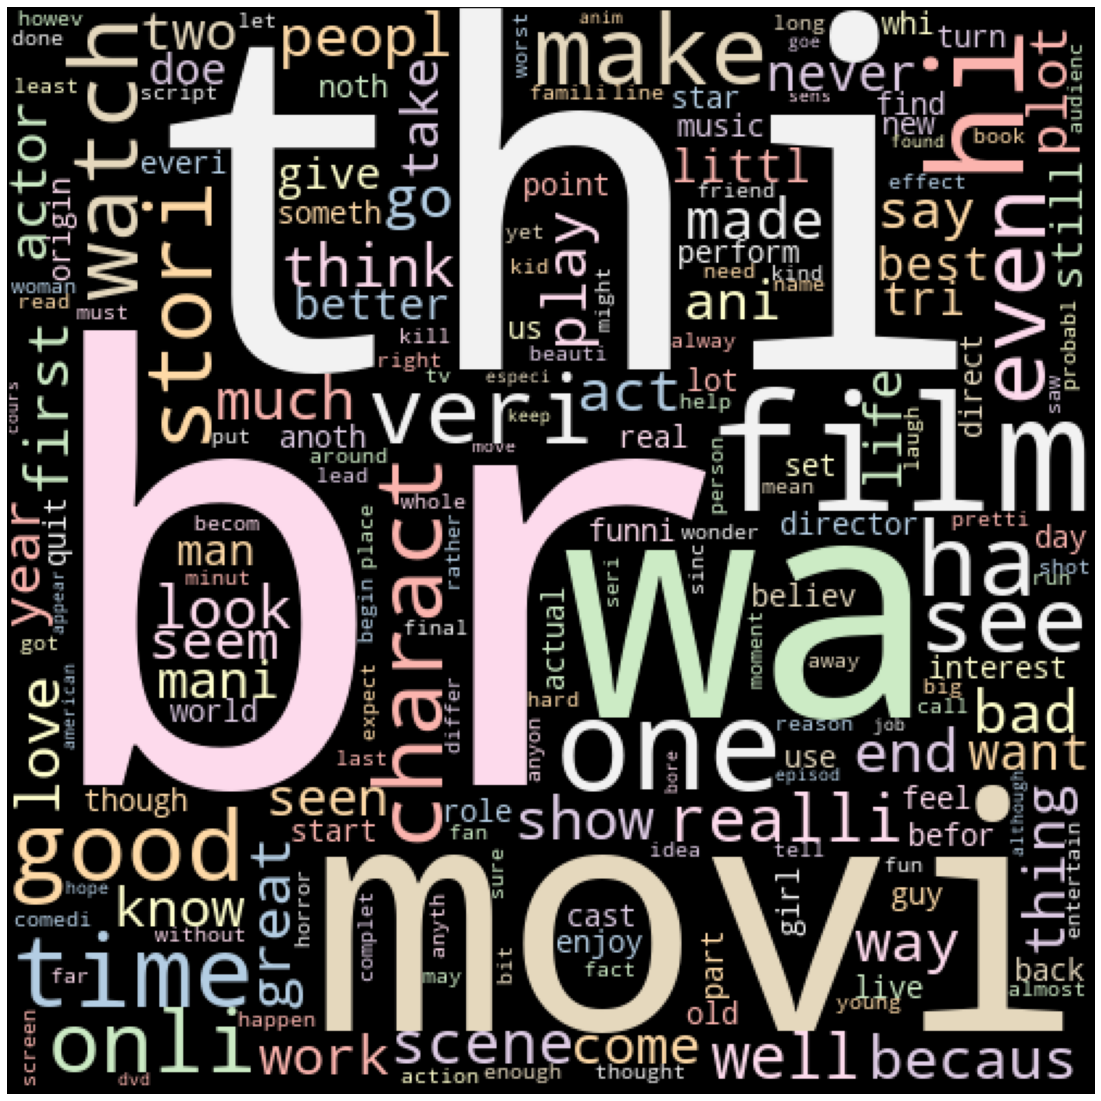

In [31]:
#train
def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");
wordcloud = WordCloud(width = 500, height = 500, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
plot_cloud(wordcloud)

with bag of word we make a dictionary of word vector and after that plot the word cloud

### get 5000 most used words and store another dictionary

In [32]:
#train
most_used_words = {}
cnt = 0
index = 0
for word, freq in word_dict:
    most_used_words[word] = index
    index += 1
    cnt += 1
    if cnt == 5000:
        break
list(most_used_words.items())[0:10]

[('br', 0),
 ('thi', 1),
 ('movi', 2),
 ('wa', 3),
 ('film', 4),
 ('hi', 5),
 ('one', 6),
 ('like', 7),
 ('ha', 8),
 ('time', 9)]

**We will remove words not in most used word dict and we change every word with its index**

In [33]:
#train
X_train = []
for i in range(X.shape[0]):
    list_ = []
    for w in X[i]:
        try:
            list_.append(most_used_words[w])
        except:
            pass
    X_train.append(list_)
for i in X_train[0]:
    print(i, end=" ")

1293 239 1383 6 1028 4649 300 537 52 119 9 110 3036 4 11 1713 182 124 1345 24 1293 823 3 6 50 60 325 1605 111 4 1 537 55 101 2784 40 1748 72 58 13 1147 1009 64 210 3686 347 182 563 0 0 823 221 127 69 470 582 86 2329 1429 1429 6 6 509 4044 2852 1293 28 28 529 1134 1464 1322 924 50 542 137 882 938 1884 3563 537 149 187 1429 3830 1134 1164 1293 165 118 297 127 483 1134 767 69 1429 1056 56 2225 531 456 52 425 516 1547 1452 3 237 53 90 456 137 3258 0 0 55 1161 425 1293 8 4650 143 522 34 145 50 823 3 1017 22 694 580 513 341 267 537 19 1490 225 67 208 1948 4473 143 1 9 119 963 480 97 37 12 3890 112 634 522 17 2770 78 99 74 3080 40 3081 1059 248 823 3 822 1432 868 372 6 2374 1073 126 6 2366 1083 1135 504 2852 1070 22 1349 2125 370 556 121 75 578 3362 187 217 9 119 4191 237 323 61 618 945 463 21 64 11 152 157 4 18 523 46 2952 515 506 0 0 494 519 1237 3595 664 313 3466 960 383 198 598 194 92 1293 8 2069 416 829 49 92 15 563 1 405 111 350 71 7 76 14 851 847 985 20 1016 1322 451 3037 972 1187 2144

In [34]:
leng = 0
for i in range(len(X_train)):
    leng += len(X_train[i])
leng / len(X_train)

120.49816

In [35]:
X_train = np.array(X_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


### **RNN**

In [36]:
import tensorflow as tf
from tensorflow import keras
X_train = keras.preprocessing.sequence.pad_sequences(X_train, 125)

In [37]:
print(X_train.shape)
for i in X_train[0]:
    print(i, end=" ")

(25000, 125)
29 42 293 1 157 347 11 43 1524 24 7 1615 3081 8 5 1057 935 427 58 156 76 7 1 1900 93 117 3081 39 344 1 2704 1 6 5 385 810 615 4 12 6 1764 249 262 327 1033 204 38 29 20 12 130 557 146 655 18 4044 2619 1922 613 165 192 1511 108 50 542 1653 3916 432 7 1156 256 274 7 1 2 0 0 18 747 253 1293 239 3 1062 9 69 162 87 1 276 1144 268 268 13 312 92 54 152 53 9 410 799 1 128 568 1293 239 1383 7 2131 3890 4519 194 861 823 3081 99 1355 34 418 33 2154 110 45 780 

### *prepare lables for deep learningn*

In [38]:
y[0:5]

0    negative
1    negative
2    positive
3    negative
4    negative
Name: sentiment, dtype: object

In [39]:
y = [1 if i=="positive" else 0 for i in y]
y[0:5]

[0, 0, 1, 0, 0]

### spilt train dataset to train and validation

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, np.array(y), test_size = 0.2)

### LSTM Model 

In [41]:
lstm_model = keras.Sequential()
lstm_model.add(keras.layers.Embedding(5000, 32, input_length=125))
lstm_model.add(keras.layers.LSTM(100, return_sequences = True))
lstm_model.add(keras.layers.Dropout(0.5))
lstm_model.add(keras.layers.LSTM(100, return_sequences = False))
lstm_model.add(keras.layers.Dropout(0.5))
lstm_model.add(keras.layers.Dense(1, activation="sigmoid"))
lstm_model.compile(optimizer="rmsprop", loss=keras.losses.binary_crossentropy, metrics="accuracy")

In [42]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 125, 32)           160000    
_________________________________________________________________
lstm (LSTM)                  (None, 125, 100)          53200     
_________________________________________________________________
dropout (Dropout)            (None, 125, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 293,701
Trainable params: 293,701
Non-trainable params: 0
__________________________________________________

In [43]:
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(
    monitor = "val_accuracy",
    factor = 0.5,
    patience = 3,
    verbose = 1,
    min_lr = 0.000001
)
early_stopping = keras.callbacks.EarlyStopping(patience=2, verbose=1)
mcp_save = keras.callbacks.ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min', verbose = 1)

In [44]:
import matplotlib.pyplot as plt
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show() 

In [45]:
history = lstm_model.fit(X_train, y_train, epochs=10 , batch_size=32, validation_data = (X_test, y_test),
                   callbacks = [learning_rate_reduction, early_stopping, mcp_save])


Epoch 1/10
625/625 [==============================] - 58s 79ms/step - loss: 0.4171 - accuracy: 0.8145 - val_loss: 0.3273 - val_accuracy: 0.8648

Epoch 00001: val_loss improved from inf to 0.32731, saving model to .mdl_wts.hdf5
Epoch 2/10
625/625 [==============================] - 48s 77ms/step - loss: 0.2892 - accuracy: 0.8870 - val_loss: 0.3067 - val_accuracy: 0.8712

Epoch 00002: val_loss improved from 0.32731 to 0.30666, saving model to .mdl_wts.hdf5
Epoch 3/10
625/625 [==============================] - 49s 78ms/step - loss: 0.2584 - accuracy: 0.9020 - val_loss: 0.3001 - val_accuracy: 0.8750

Epoch 00003: val_loss improved from 0.30666 to 0.30015, saving model to .mdl_wts.hdf5
Epoch 4/10
625/625 [==============================] - 49s 78ms/step - loss: 0.2408 - accuracy: 0.9100 - val_loss: 0.3073 - val_accuracy: 0.8782

Epoch 00004: val_loss did not improve from 0.30015
Epoch 5/10
625/625 [==============================] - 49s 78ms/step - loss: 0.2215 - accuracy: 0.9173 - val_loss: 0

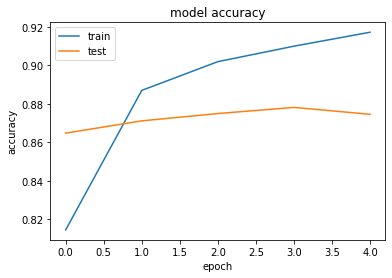

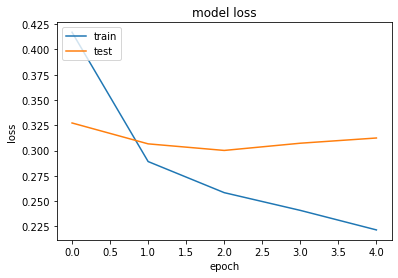

In [46]:
plot_history(history)

save lstm model weights 

In [47]:
lstm_model.load_weights('.mdl_wts.hdf5')

### GRU Model

In [48]:
gru_model = keras.Sequential()
gru_model.add(keras.layers.Embedding(5000, 32, input_length=125))
gru_model.add(keras.layers.GRU(100, return_sequences = True, activation = "tanh"))
gru_model.add(keras.layers.Dropout(0.5))
gru_model.add(keras.layers.GRU(100, return_sequences = False, activation = "tanh"))
gru_model.add(keras.layers.Dropout(0.5))
gru_model.add(keras.layers.Dense(1, activation="sigmoid"))
gru_model.compile(optimizer="rmsprop", loss=keras.losses.binary_crossentropy, metrics="accuracy")

In [49]:
gru_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 125, 32)           160000    
_________________________________________________________________
gru (GRU)                    (None, 125, 100)          40200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 125, 100)          0         
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               60600     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 260,901
Trainable params: 260,901
Non-trainable params: 0
________________________________________________

Epoch 1/10
625/625 [==============================] - 51s 77ms/step - loss: 0.4425 - accuracy: 0.7868 - val_loss: 0.3167 - val_accuracy: 0.8670

Epoch 00001: val_loss did not improve from 0.30015
Epoch 2/10
625/625 [==============================] - 47s 76ms/step - loss: 0.2973 - accuracy: 0.8824 - val_loss: 0.3022 - val_accuracy: 0.8776

Epoch 00002: val_loss did not improve from 0.30015
Epoch 3/10
625/625 [==============================] - 47s 75ms/step - loss: 0.2576 - accuracy: 0.9025 - val_loss: 0.2982 - val_accuracy: 0.8772

Epoch 00003: val_loss improved from 0.30015 to 0.29825, saving model to .mdl_wts.hdf5
Epoch 4/10
625/625 [==============================] - 47s 75ms/step - loss: 0.2349 - accuracy: 0.9099 - val_loss: 0.2926 - val_accuracy: 0.8842

Epoch 00004: val_loss improved from 0.29825 to 0.29262, saving model to .mdl_wts.hdf5
Epoch 5/10
625/625 [==============================] - 47s 76ms/step - loss: 0.2094 - accuracy: 0.9208 - val_loss: 0.2954 - val_accuracy: 0.8852

E

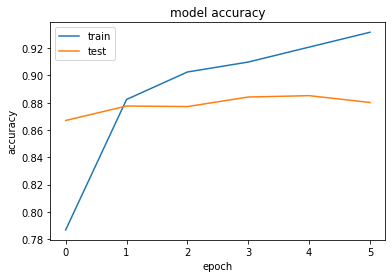

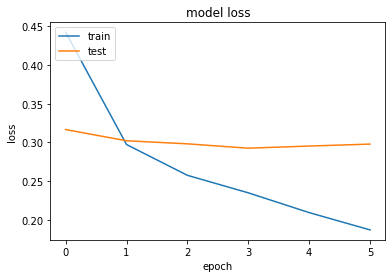

In [50]:
history = gru_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data = (X_test, y_test),
                   callbacks = [learning_rate_reduction, early_stopping, mcp_save])
plot_history(history)

savegru model weights

In [51]:
gru_model.load_weights('.mdl_wts.hdf5')

In [52]:
test_lst_review=[]
test_lst_sentiment=[]
for i in data_test['review'].items():
    test_lst_review.append(i[1])
for i in data_test['sentiment'].items():
    test_lst_sentiment.append(i[1])

In [53]:
import re
gru_pos_pred=[]
gru_neg_pred=[]
gru_final_pred=[]
lstm_final_pred=[]
def predict(review):
    
    # remove non alphabetic characters
    review = re.sub('[^A-Za-z]', ' ', review) 
    
    # stemming
    review = review.split(" ")
    review = [w for w in review if w != ""]
    review = [stemmer.stem(w) for w in review]
    
    # remove stepwords
    review = [w for w in review if w not in stopwords_]
    
    # get bag of words
    list_ = []
    for w in review:
        try:
            list_.append(most_used_words[w])
        except:
            pass
    test = [list_]
    test = np.array(test)
    test = keras.preprocessing.sequence.pad_sequences(test, 125)
    gru_pred = gru_model.predict(test)[0][0]
    lstm_pred=lstm_model.predict(test)[0][0]
    # gru_pos_pred.append(gru_pred)
    # gru_neg_pred.append(1-gru_pred)
    if gru_pred>1-gru_pred:
      gru_final_pred.append('positive')
    else:
        gru_final_pred.append('negative')

    if lstm_pred>1-lstm_pred:
      lstm_final_pred.append('positive')
    else:
        lstm_final_pred.append('negative')
    
    # print("Positive : ", pred)
    # print("Negative : ", 1-pred)

In [54]:
for i in test_lst_review:
     predict(i)
   
  

In [55]:
len(lstm_final_pred)

25000

In [56]:
gru_final_pred

['negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',

In [66]:
details = {
    'review' : test_lst_review,
    'real_sentiment' : test_lst_sentiment,
    'gru prediction' :gru_final_pred,
    'lstm prediction'  : lstm_final_pred
}

### *check number of true prediction *

In [68]:
c=[a for a, b in zip(test_lst_sentiment, gru_final_pred) if a==b]
len(c)

21761

21761 from 25000 test data is prediction true(gru model)

In [69]:
d=[a for a, b in zip(test_lst_sentiment, lstm_final_pred) if a==b]
len(d)

21642

21642 from 25000 test data is prediction true(lstm model)

In [63]:
df = pd.DataFrame(details)

In [70]:
df

review  ... lstm prediction
0      Not as bad as "Billy Bathgate" but close. Try ...  ...        negative
1      French Cinema sucks! Down with all these psych...  ...        negative
2      Wealthy businessman's daughter, who as a young...  ...        negative
3      Pretty pictures with a cool sound track do not...  ...        negative
4      Back in the day, I was one of the RN's in the ...  ...        positive
...                                                  ...  ...             ...
24995  The horror of this made for TV film was that i...  ...        negative
24996  When I attended college in the early 70s, it w...  ...        positive
24997  I don't see that much wrong with this movie. G...  ...        negative
24998  I watched this last night on Sundance. Altman ...  ...        negative
24999  Simply one of the greatest films ever made. Wo...  ...        positive

[25000 rows x 4 columns]

In [72]:
df.to_csv("final sentiment.csv")